# ADA BOOST ON IRIS DATASET

## Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [66]:
dataset=load_iris()
data=pd.DataFrame(dataset.data)
y=pd.DataFrame(dataset.target)
data.columns=dataset.feature_names
data['Species']=y

## Seeing the dataset

In [67]:
data.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0        0  
1        0  
2        0  
3        0  
4        0

## Seeing the size and shape of the dataset


In [68]:
print(data.shape)
print(data.size)

(150, 5)
750


## Visualising the relationship between different features in dataset

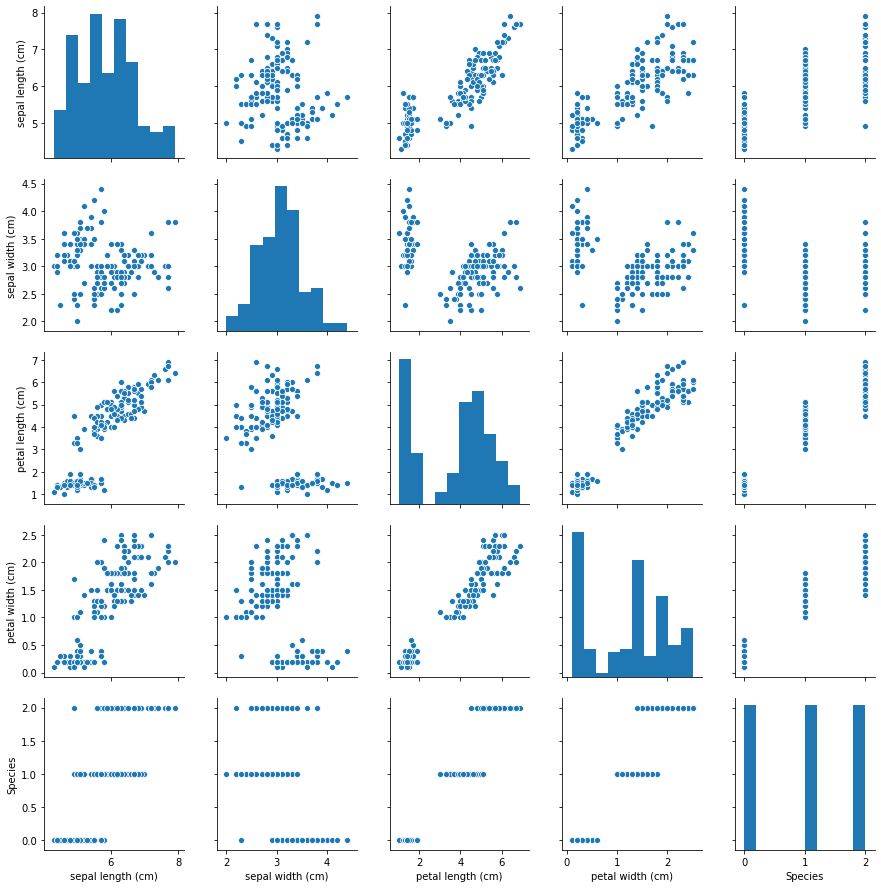

In [69]:
sns.pairplot(data)

## Heatmap

[]

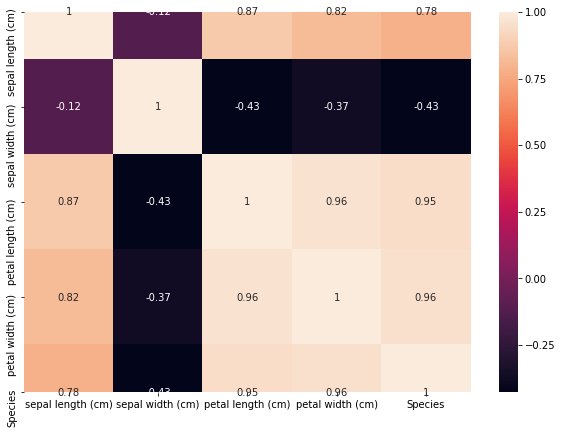

In [70]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.plot()

## Breaking the dataset into features and the target variables

In [71]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

## Dividing the data into train and test

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


## Training the model using Decision Tree as base estimator

In [74]:
from sklearn.ensemble import AdaBoostClassifier

model=AdaBoostClassifier(n_estimators=50,learning_rate=1)

model.fit(x_train,y_train)

y_predict=model.predict(x_test)


## Evaluating the performance of the model

In [77]:
from sklearn.metrics import confusion_matrix

confusion=confusion_matrix(y_test,y_predict)

print(confusion)

print(model.score(x_test,y_test))

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
0.9666666666666667


## Using SVC as a base estimator building a model

In [84]:
from sklearn.ensemble import AdaBoostClassifier

from sklearn.svm import SVC

svc=SVC(probability=True,kernel='linear')

model=AdaBoostClassifier(n_estimators=50,base_estimator=svc,learning_rate=1)

model.fit(x_train,y_train)

y_predict=model.predict(x_test)

## Evaluating the performance of model

In [85]:
from sklearn.metrics import confusion_matrix

confusion=confusion_matrix(y_test,y_predict)

print(confusion)

print(model.score(x_test,y_test))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
1.0
